<a href="https://colab.research.google.com/github/kientran1706/kientran.github./blob/main/B%C3%80I_T%E1%BA%ACP_GI%E1%BB%AEA_K%E1%BB%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bài tập 1: Thực hiện thống kê mô tả trên tập dữ liệu về phân loại chất lượng rượu đỏ.**




*Nhiệm vụ 1: Khám phá dữ liệu chất lượng rượu vang đỏ*

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
wine_data = pd.read_csv("winequality-red.csv")

# Giữ nguyên toàn bộ cột, hoặc chọn vài cột tùy nhu cầu
# Ở đây ta giữ nguyên để tham khảo
wine_data.head(5)        # Xem 5 dòng đầu
wine_data.dtypes         # Kiểu dữ liệu từng cột
wine_data.shape          # Kích thước bảng

# Lấy dữ liệu của cột 'alcohol' để tính toán (loại bỏ giá trị thiếu nếu có)
alcohol_col = wine_data["alcohol"].dropna()

# Get the mean of the data
data_mean = np.mean(alcohol_col)

# Get the median of the data
data_median = np.median(alcohol_col)

# Get the mode of the data
data_mode = stats.mode(alcohol_col, keepdims=True)

# Obtain the variance of the data (phương sai mẫu)
data_variance = np.var(alcohol_col, ddof=1)

# Obtain the standard deviation of the data (độ lệch chuẩn mẫu)
data_sd = np.std(alcohol_col, ddof=1)

# Compute the maximum and minimum values of the data
data_max = np.max(alcohol_col)
data_min = np.min(alcohol_col)

# Obtain the 60th percentile of the data
data_percentile = np.percentile(alcohol_col, 60)

# Obtain the quartiles of the data (ví dụ: Q3)
data_quartile = np.quantile(alcohol_col, 0.75)

# Get the IQR of the data
data_IQR = stats.iqr(alcohol_col)

# In kết quả ra màn hình (nếu muốn)
print("Mean:", data_mean)
print("Median:", data_median)
print("Mode:", data_mode.mode[0], "(count:", data_mode.count[0], ")")
print("Variance:", data_variance)
print("Standard Deviation:", data_sd)
print("Max:", data_max, "Min:", data_min)
print("60th Percentile:", data_percentile)
print("Q3 (0.75 quantile):", data_quartile)
print("Interquartile Range (IQR):", data_IQR)


Mean: 10.422983114446529
Median: 10.2
Mode: 9.5 (count: 139 )
Variance: 1.1356473950004693
Standard Deviation: 1.0656675818473926
Max: 14.9 Min: 8.4
60th Percentile: 10.5
Q3 (0.75 quantile): 11.1
Interquartile Range (IQR): 1.5999999999999996


*Nhiệm vụ 2: Loại bỏ dữ liệu trùng lặp*

In [2]:
# xem 5 dòng đầu của dữ liệu
wine_data.head()
# loại bỏ các hàng trùng lặp
wine_data_duplicate = wine_data.drop_duplicates()
# xóa hàng có chỉ số 1
wine_data.drop(labels=[1], axis=0)
# xóa cột 'pH'
wine_data.drop(labels=['pH'], axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,5


*Nhiệm vụ 3: Thay thế dữ liệu và thay đổi định dạng của dữ liệu*

In [3]:
# thay giá trị 3,4,5 của quality thành low, low, medium
wine_data['quality_replaced'] = wine_data['quality'].replace([3,4,5], ['low','low','medium'])
# điền giá trị 0 cho các ô trống trong cột alcohol
wine_data['alcohol'] = wine_data['alcohol'].fillna(0)
# chuyển kiểu dữ liệu alcohol sang int
wine_data['alcohol_changed'] = wine_data['alcohol'].astype(int)

*Nhiệm vụ 4: Xử lý dữ liệu thiếu*

In [4]:
# đếm số giá trị thiếu của từng cột
wine_data.isnull().sum()
# xóa các hàng có giá trị thiếu
wine_data_withoutna = wine_data.dropna(how='any')
# xem kích thước dữ liệu sau khi xóa
wine_data_withoutna.shape

(1599, 14)

# **Bài tập 2: Thực hiện thống kê mô tả trên tập dữ liệu về về bệnh tiểu đường.**

*Nhiệm vụ 1: Khám phá dữ liệu về bệnh tiểu đường*

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
diabetes_data = pd.read_csv("diabetes.csv")
import numpy as np
import pandas as pd
from scipy import stats

# Đọc file CSV (đặt file 'diabetes.csv' cùng thư mục hoặc sửa đường dẫn)
diabetes = pd.read_csv("diabetes.csv")
# Xem 5 dòng đầu
diabetes.head()
# Kiểu dữ liệu từng cột
diabetes.dtypes
# Kích thước dữ liệu
diabetes.shape
# Lấy cột 'Glucose' để phân tích (loại bỏ giá trị thiếu nếu có)
glucose = diabetes['Glucose'].dropna()
# Tính mean
data_mean = np.mean(glucose)
# Tính median
data_median = np.median(glucose)
# Tính mode
data_mode = stats.mode(glucose, keepdims=True)
# Tính variance (phương sai mẫu)
data_variance = np.var(glucose, ddof=1)
# Tính standard deviation (độ lệch chuẩn mẫu)
data_sd = np.std(glucose, ddof=1)
# Giá trị lớn nhất
data_max = np.max(glucose)
# Giá trị nhỏ nhất
data_min = np.min(glucose)
# Range
data_range = data_max - data_min
# 60th percentile
data_percentile_60 = np.percentile(glucose, 60)
# Q1 (25th percentile)
q1 = np.percentile(glucose, 25)
# Q3 (75th percentile)
q3 = np.percentile(glucose, 75)
# IQR
data_IQR = stats.iqr(glucose)
# In kết quả thống kê
print("Glucose - Mean:", data_mean)
print("Glucose - Median:", data_median)
print("Glucose - Mode:", data_mode.mode[0], "(count:", data_mode.count[0], ")")
print("Glucose - Variance:", data_variance)
print("Glucose - Std:", data_sd)
print("Glucose - Min:", data_min, "Max:", data_max, "Range:", data_range)
print("Glucose - 60th percentile:", data_percentile_60)
print("Glucose - Q1:", q1, "Q3:", q3, "IQR:", data_IQR)

Glucose - Mean: 120.89453125
Glucose - Median: 117.0
Glucose - Mode: 99 (count: 17 )
Glucose - Variance: 1022.2483142519557
Glucose - Std: 31.97261819513622
Glucose - Min: 0 Max: 199 Range: 199
Glucose - 60th percentile: 125.0
Glucose - Q1: 99.0 Q3: 140.25 IQR: 41.25


*Nhiệm vụ 2: Loại bỏ dữ liệu trùng lặp*

In [6]:
# Xem 5 dòng đầu (lần nữa nếu cần)
diabetes.head()
# Loại bỏ các hàng trùng lặp
diabetes_duplicate = diabetes.drop_duplicates()
# Xóa hàng có index = 1 (không ghi đè, nếu muốn ghi đè thêm inplace=True)
diabetes.drop(labels=[1], axis=0)
# Xóa một cột (ví dụ 'SkinThickness')
diabetes.drop(labels=['SkinThickness'], axis=1)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


*Nhiệm vụ 3: Thay thế dữ liệu và thay đổi định dạng của dữ liệu*

In [7]:
# Thay giá trị 0/1 của 'Outcome' thành chuỗi 'no_diabetes'/'diabetes'
diabetes['Outcome_replaced'] = diabetes['Outcome'].replace([0,1], ['no_diabetes','diabetes'])
# Điền giá trị thiếu trong cột 'Insulin' bằng 0
diabetes['Insulin'] = diabetes['Insulin'].fillna(0)
# Chuyển kiểu dữ liệu cột 'Insulin' sang int
diabetes['Insulin_changed'] = diabetes['Insulin'].astype(int)

*Nhiệm vụ 4: Xử lý dữ liệu thiếu*

In [8]:
# Kiểm tra số giá trị thiếu trên từng cột
diabetes.isnull().sum()
# Xóa các hàng có bất kỳ giá trị thiếu nào
diabetes_withoutna = diabetes.dropna(how='any')
# Xem kích thước dataset sau khi xóa các hàng thiếu
diabetes_withoutna.shape

(768, 11)

# **1.2.2. Bài tập thực hành 1**

*Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về phân loại chất lượng rượu đỏ.*

1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file rượu vang đỏ (đặt file csv cùng thư mục làm việc hoặc thay đường dẫn cho đúng)
wine_data = pd.read_csv("winequality-red.csv")

# Chọn các cột cần thiết: alcohol (nồng độ cồn) và quality (điểm chất lượng)
wine_data = wine_data[['alcohol', 'quality']]

# Tạo biến alcohol_per_quality (nồng độ cồn chia cho điểm chất lượng) để so sánh
wine_data['alcohol_per_quality'] = wine_data['alcohol'] / wine_data['quality']


*2. Trực quan hóa dữ liệu với thư viện Matplotlib*


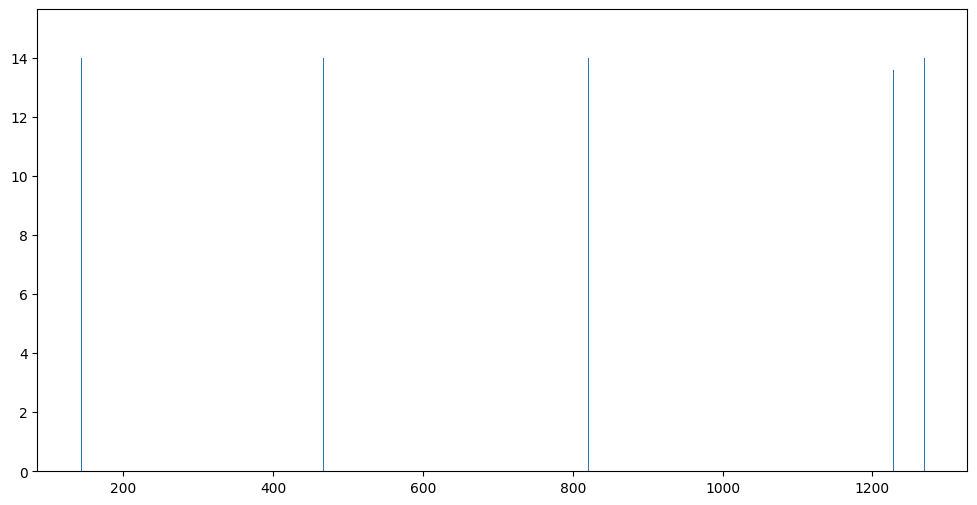

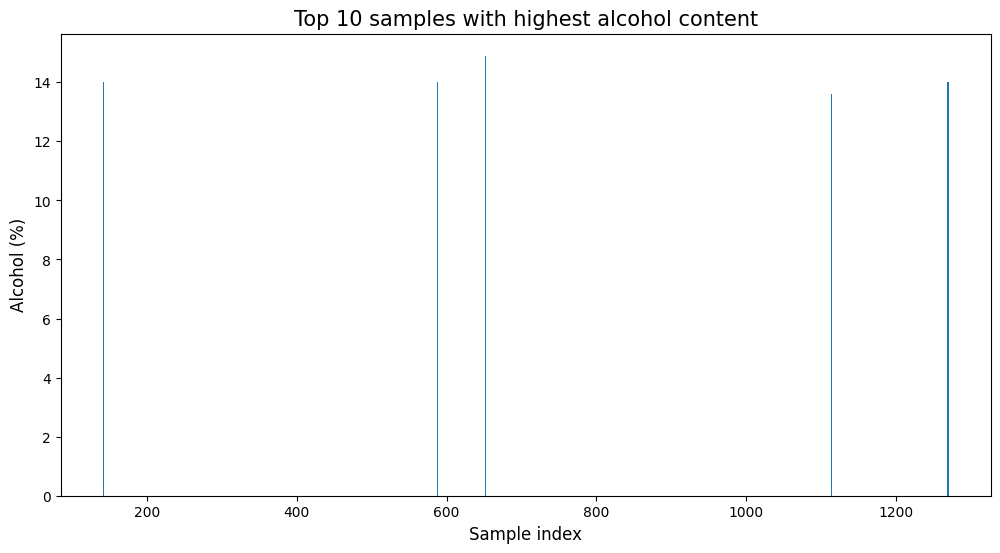

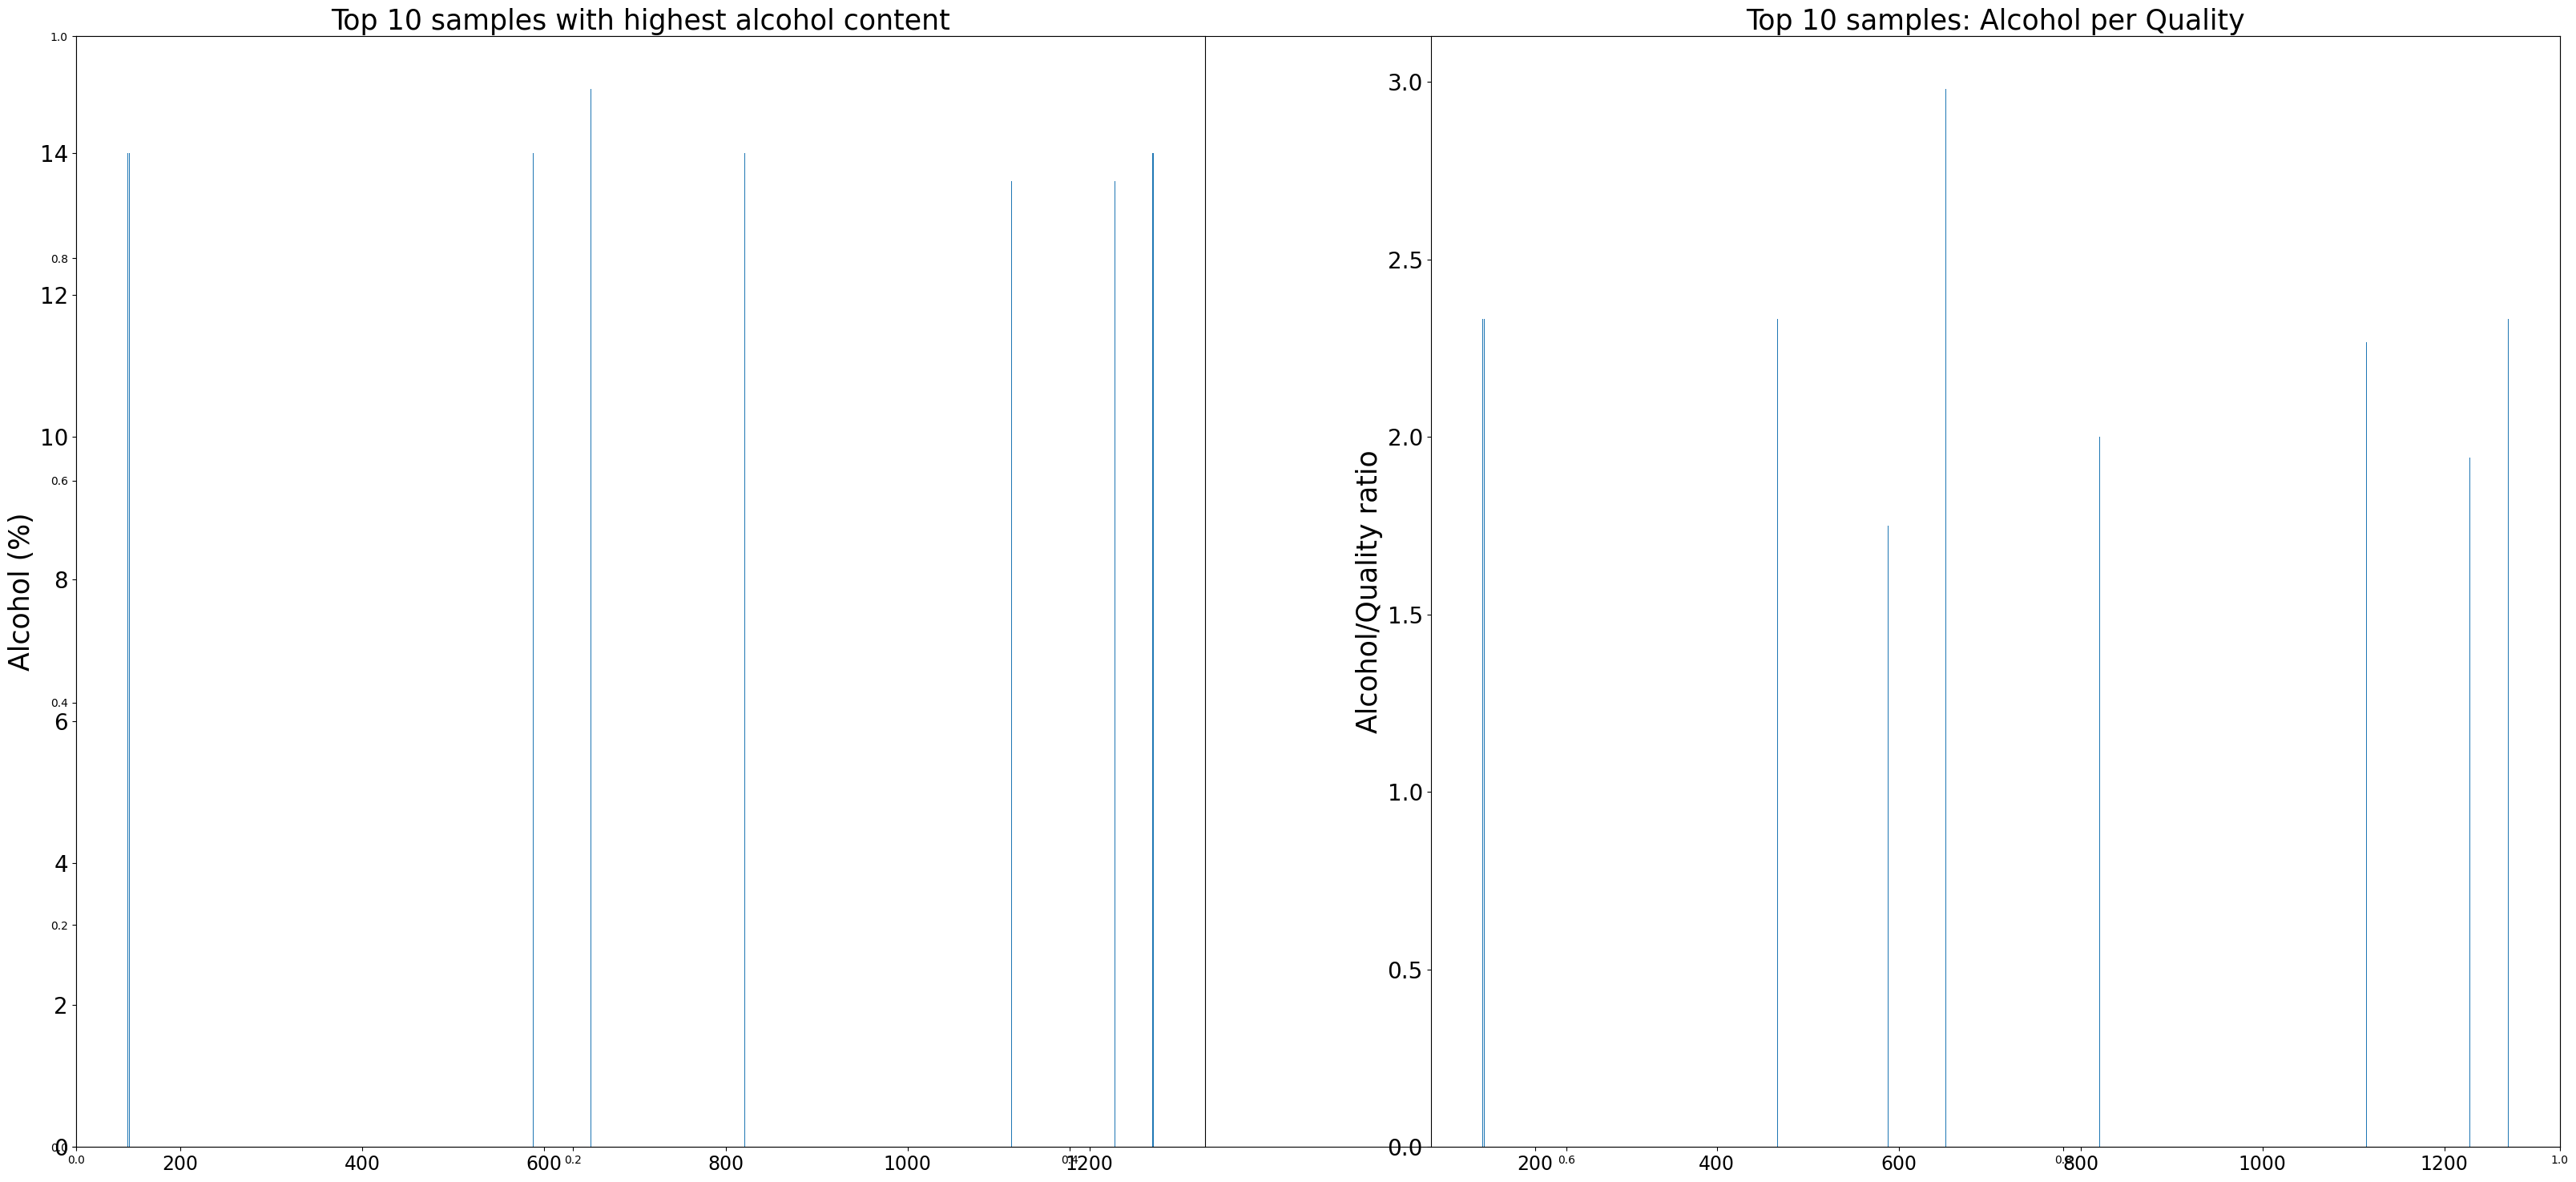

In [10]:
# Sắp xếp theo cột alcohol giảm dần
wine_sorted = wine_data.sort_values('alcohol', ascending=False)

# case 1: basic
plt.figure(figsize=(12,6))
x = wine_sorted.index[0:10]          # dùng chỉ số (index) vì không có Zip
y = wine_sorted['alcohol'][0:10]
plt.bar(x, y)
plt.show()

# case 2: advanced 1
plt.figure(figsize=(12,6))
x = wine_sorted.index[0:10]
y = wine_sorted['alcohol'][0:10]
plt.bar(x, y)
plt.title('Top 10 samples with highest alcohol content', fontsize=15)
plt.xlabel('Sample index', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Alcohol (%)', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

# case 3: advanced 2
fig, ax = plt.subplots(figsize=(40,18))
x = wine_sorted.index[0:10]
y = wine_sorted['alcohol'][0:10]
y1 = wine_sorted['alcohol_per_quality'][0:10]

plt.subplot(1,2,1)
plt.bar(x, y)
plt.xticks(fontsize=17)
plt.ylabel('Alcohol (%)', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 samples with highest alcohol content', fontsize=25)

plt.subplot(1,2,2)
plt.bar(x, y1)
plt.xticks(fontsize=17)
plt.ylabel('Alcohol/Quality ratio', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 samples: Alcohol per Quality', fontsize=25)
plt.show()


*3. Trực quan hóa dữ liệu với thư viện Seaborn*



Text(0.5, 1.0, 'Top 10 samples: Alcohol per Quality')

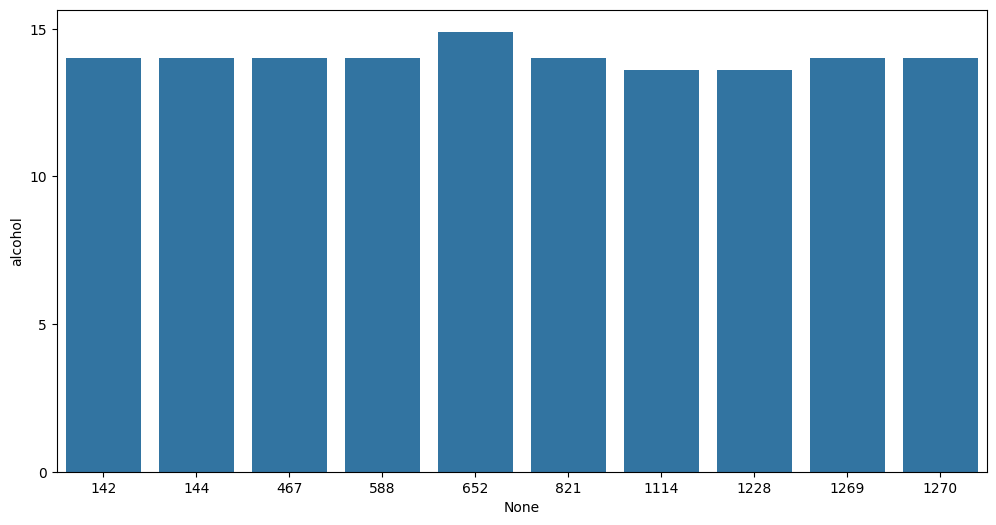

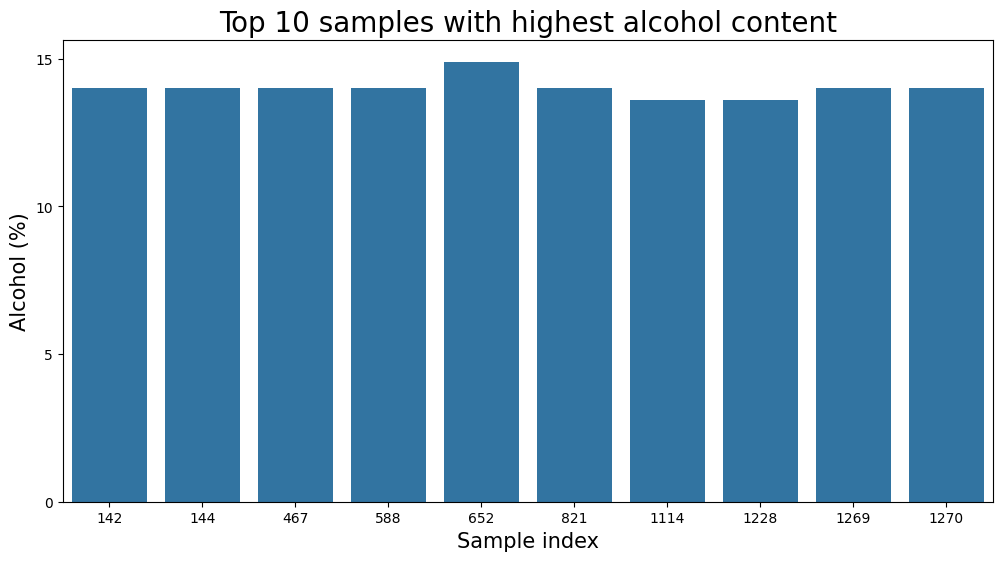

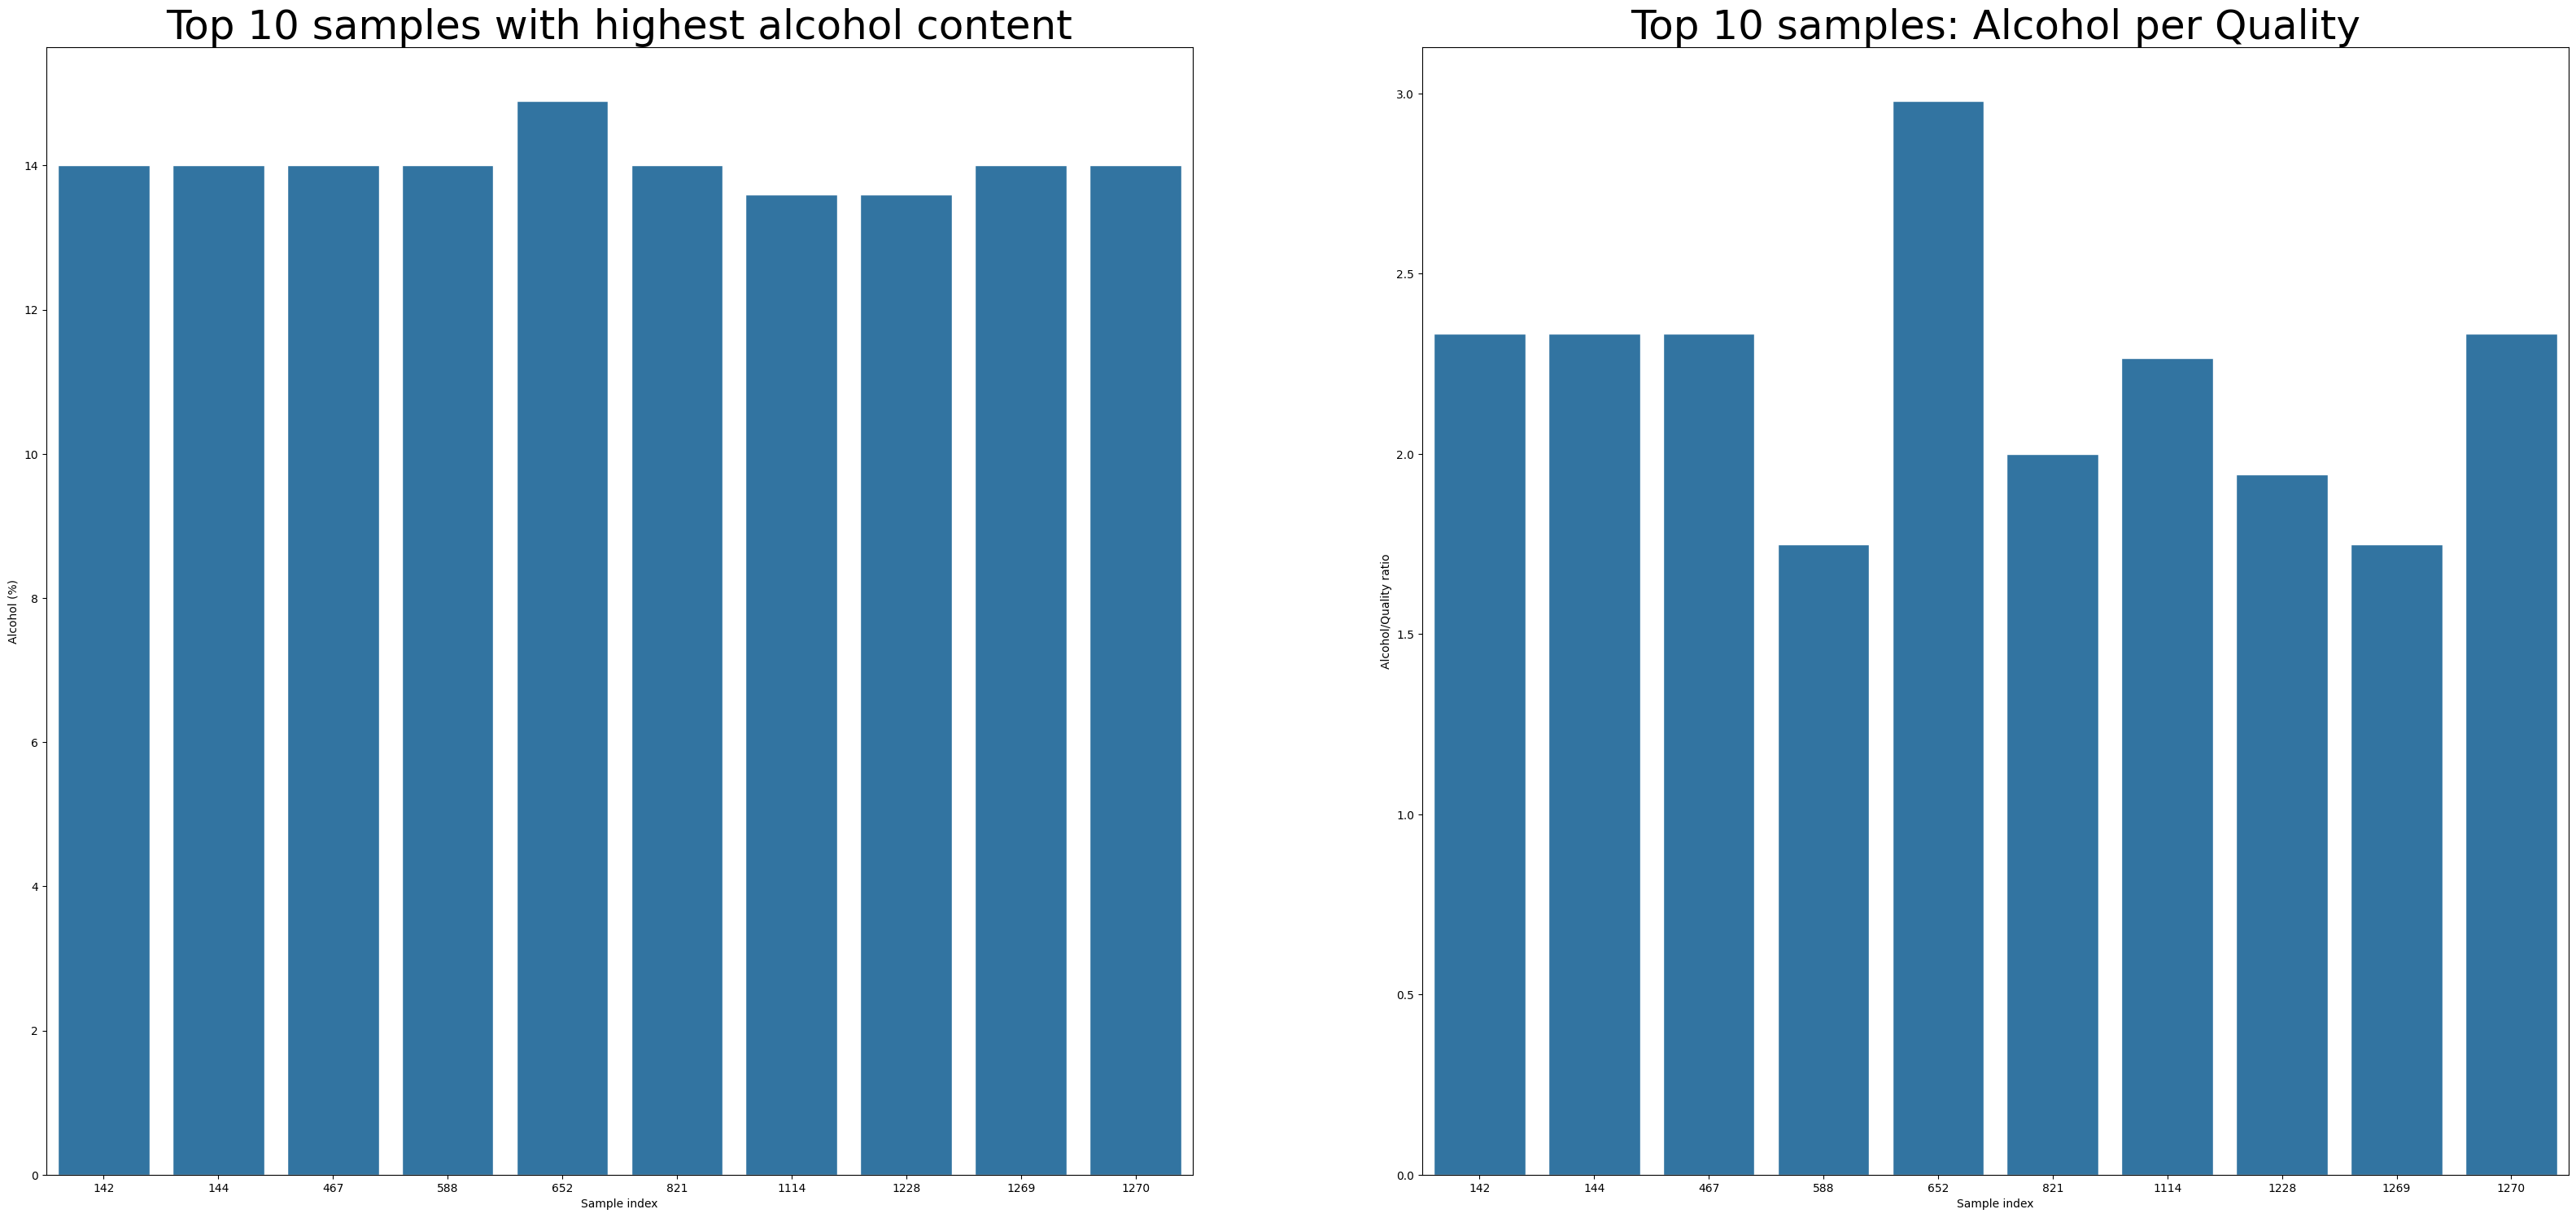

In [11]:
# case 1: basic
plt.figure(figsize=(12,6))
data = wine_sorted[0:10]
sns.barplot(data=data, x=data.index, y='alcohol')

# case 2: advanced 1
plt.figure(figsize=(12,6))
data = wine_sorted[0:10]
ax = sns.barplot(data=data, x=data.index, y='alcohol')
ax.set_xlabel('Sample index', fontsize=15)
ax.set_ylabel('Alcohol (%)', fontsize=15)
ax.set_title('Top 10 samples with highest alcohol content', fontsize=20)

# case 3: view multiple perspectives at once
fig, ax = plt.subplots(1, 2, figsize=(40,18))
data = wine_sorted[0:10]
sns.set(font_scale=3)

ax1 = sns.barplot(data=data, x=data.index, y='alcohol', ax=ax[0])
ax1.set_xlabel('Sample index')
ax1.set_ylabel('Alcohol (%)')
ax1.set_title('Top 10 samples with highest alcohol content')

ax2 = sns.barplot(data=data, x=data.index, y='alcohol_per_quality', ax=ax[1])
ax2.set_xlabel('Sample index')
ax2.set_ylabel('Alcohol/Quality ratio')
ax2.set_title('Top 10 samples: Alcohol per Quality')

# **1.2.3. Bài tập thực hành 2**

*Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về bệnh tiểu đường.*

*1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu*

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file dữ liệu bệnh tiểu đường (đặt file 'diabetes.csv' cùng thư mục làm việc)
diabetes_data = pd.read_csv("diabetes.csv")

# Chọn các cột quan trọng: Glucose và BMI
diabetes_data = diabetes_data[['Glucose', 'BMI']]

# Tạo biến Glucose_per_BMI (tỉ lệ Glucose/BMI) để so sánh
diabetes_data['Glucose_per_BMI'] = diabetes_data['Glucose'] / diabetes_data['BMI']

*2. Trực quan hóa dữ liệu với thư viện Matplotlib*

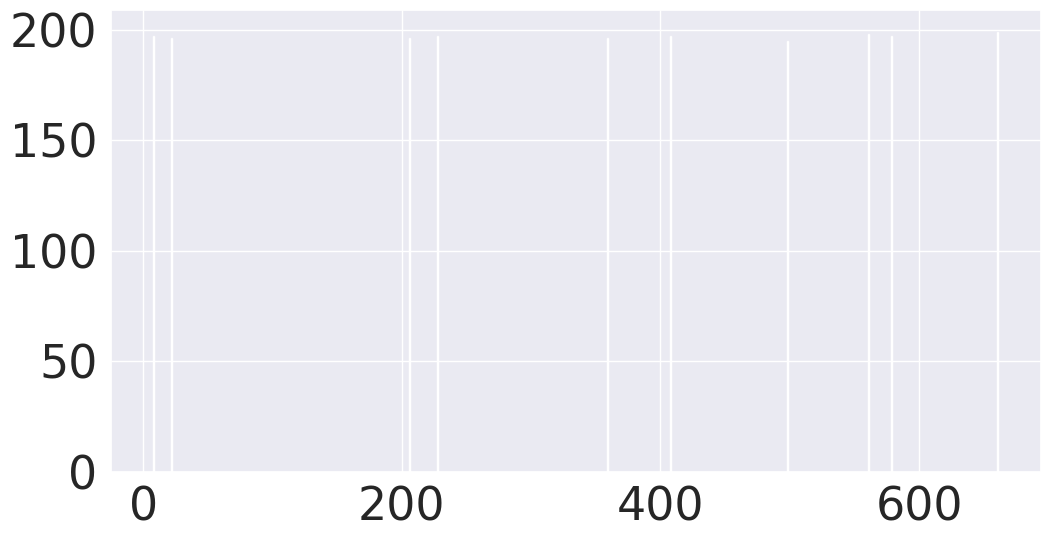

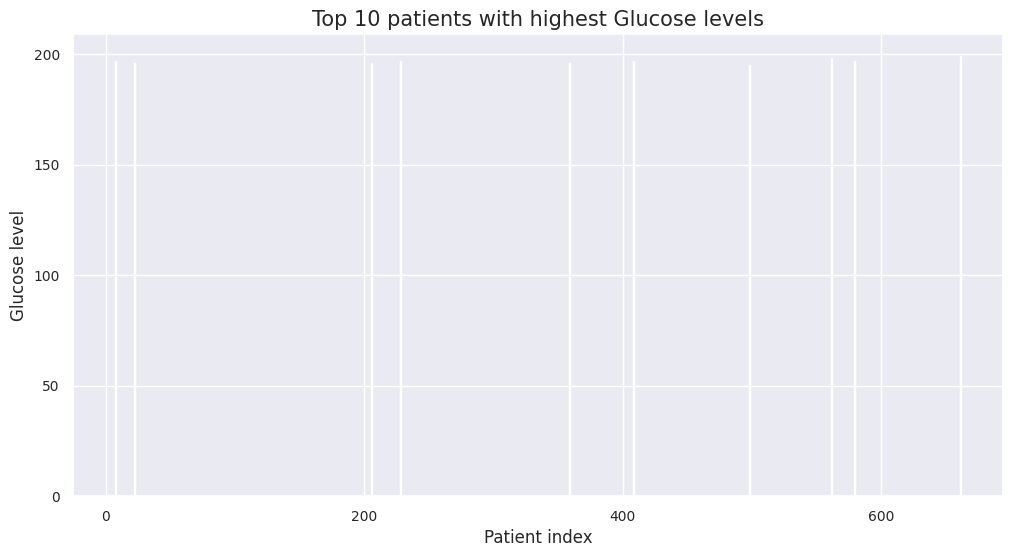

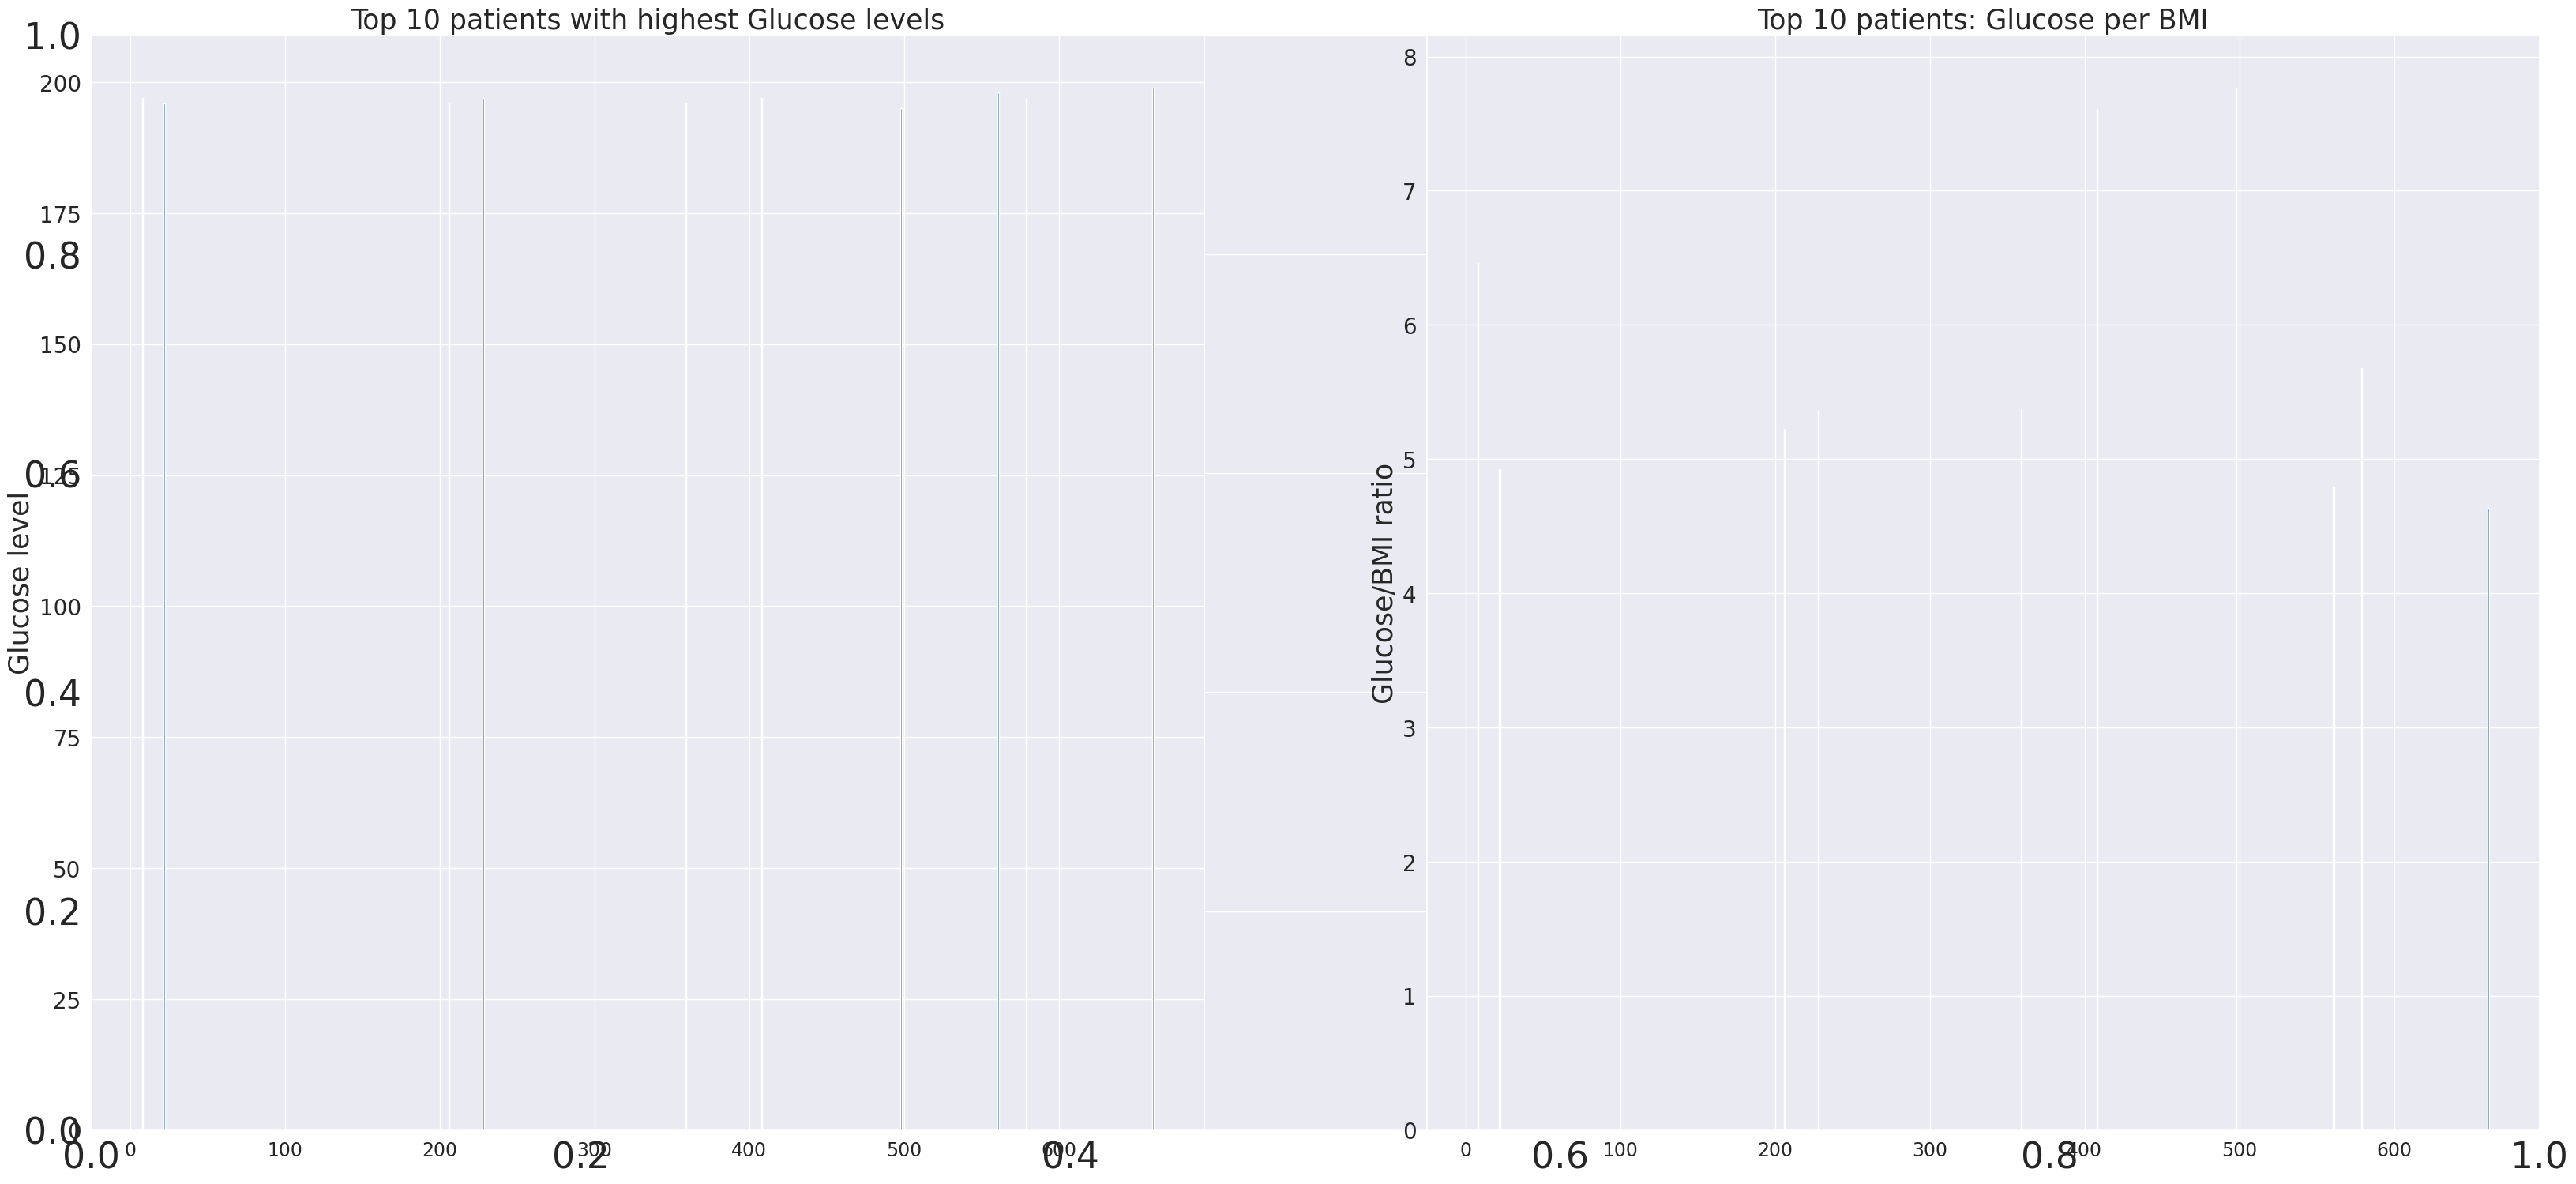

In [13]:
# Sắp xếp theo Glucose giảm dần
diabetes_sorted = diabetes_data.sort_values('Glucose', ascending=False)

# case 1: basic
plt.figure(figsize=(12,6))
x = diabetes_sorted.index[0:10]
y = diabetes_sorted['Glucose'][0:10]
plt.bar(x, y)
plt.show()

# case 2: advanced 1
plt.figure(figsize=(12,6))
x = diabetes_sorted.index[0:10]
y = diabetes_sorted['Glucose'][0:10]
plt.bar(x, y)
plt.title('Top 10 patients with highest Glucose levels', fontsize=15)
plt.xlabel('Patient index', fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Glucose level', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

# case 3: advanced 2
fig, ax = plt.subplots(figsize=(40,18))
x = diabetes_sorted.index[0:10]
y = diabetes_sorted['Glucose'][0:10]
y1 = diabetes_sorted['Glucose_per_BMI'][0:10]

plt.subplot(1,2,1)
plt.bar(x, y)
plt.xticks(fontsize=17)
plt.ylabel('Glucose level', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 patients with highest Glucose levels', fontsize=25)

plt.subplot(1,2,2)
plt.bar(x, y1)
plt.xticks(fontsize=17)
plt.ylabel('Glucose/BMI ratio', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 patients: Glucose per BMI', fontsize=25)
plt.show()


*3. Trực quan hóa dữ liệu với thư viện Seaborn*

Text(0.5, 1.0, 'Top 10 patients: Glucose per BMI')

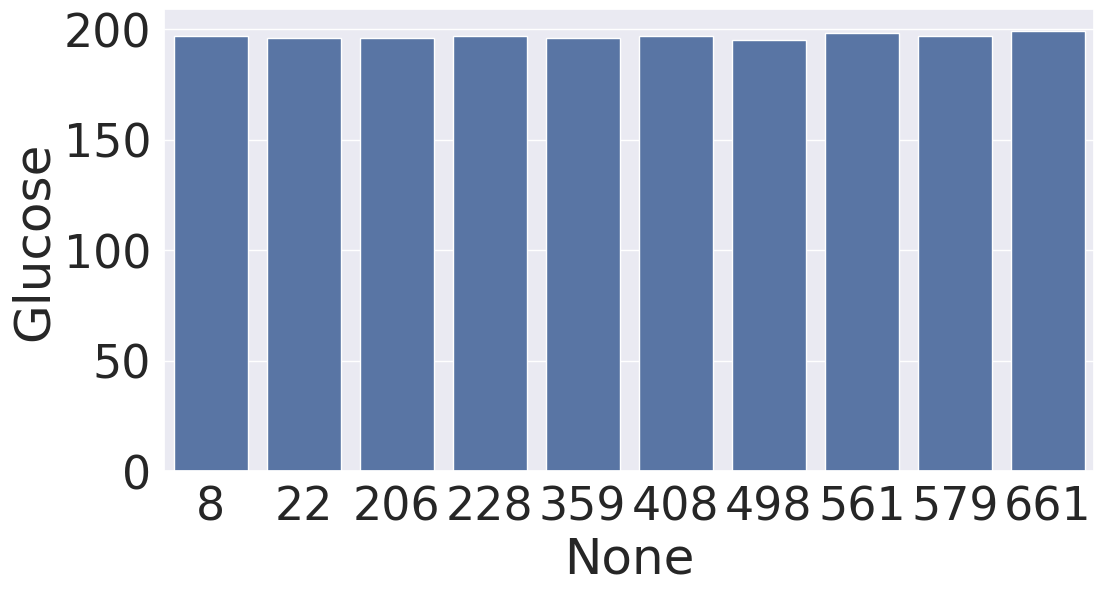

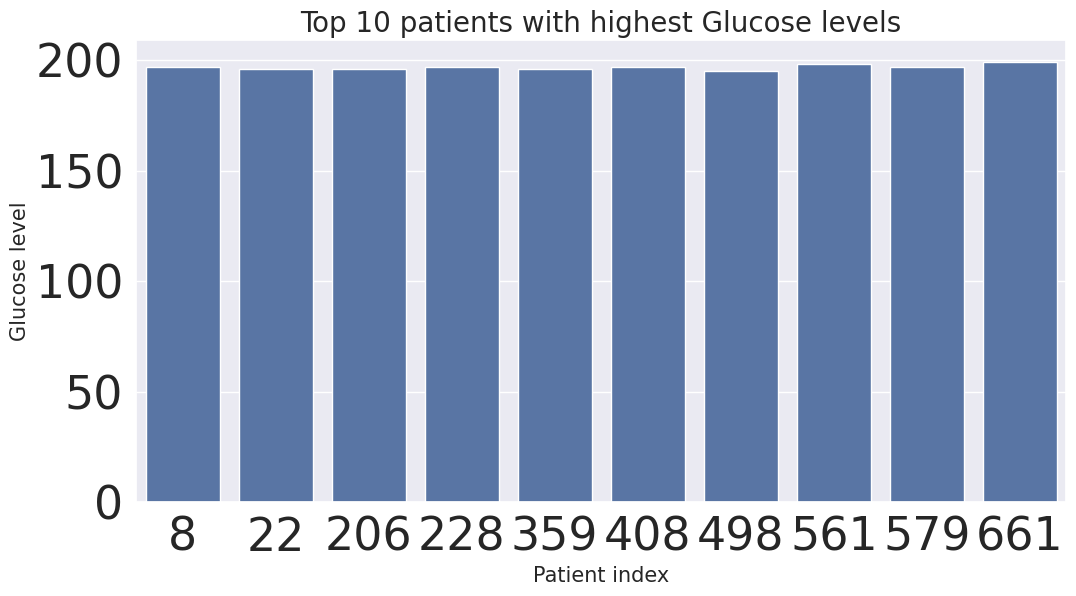

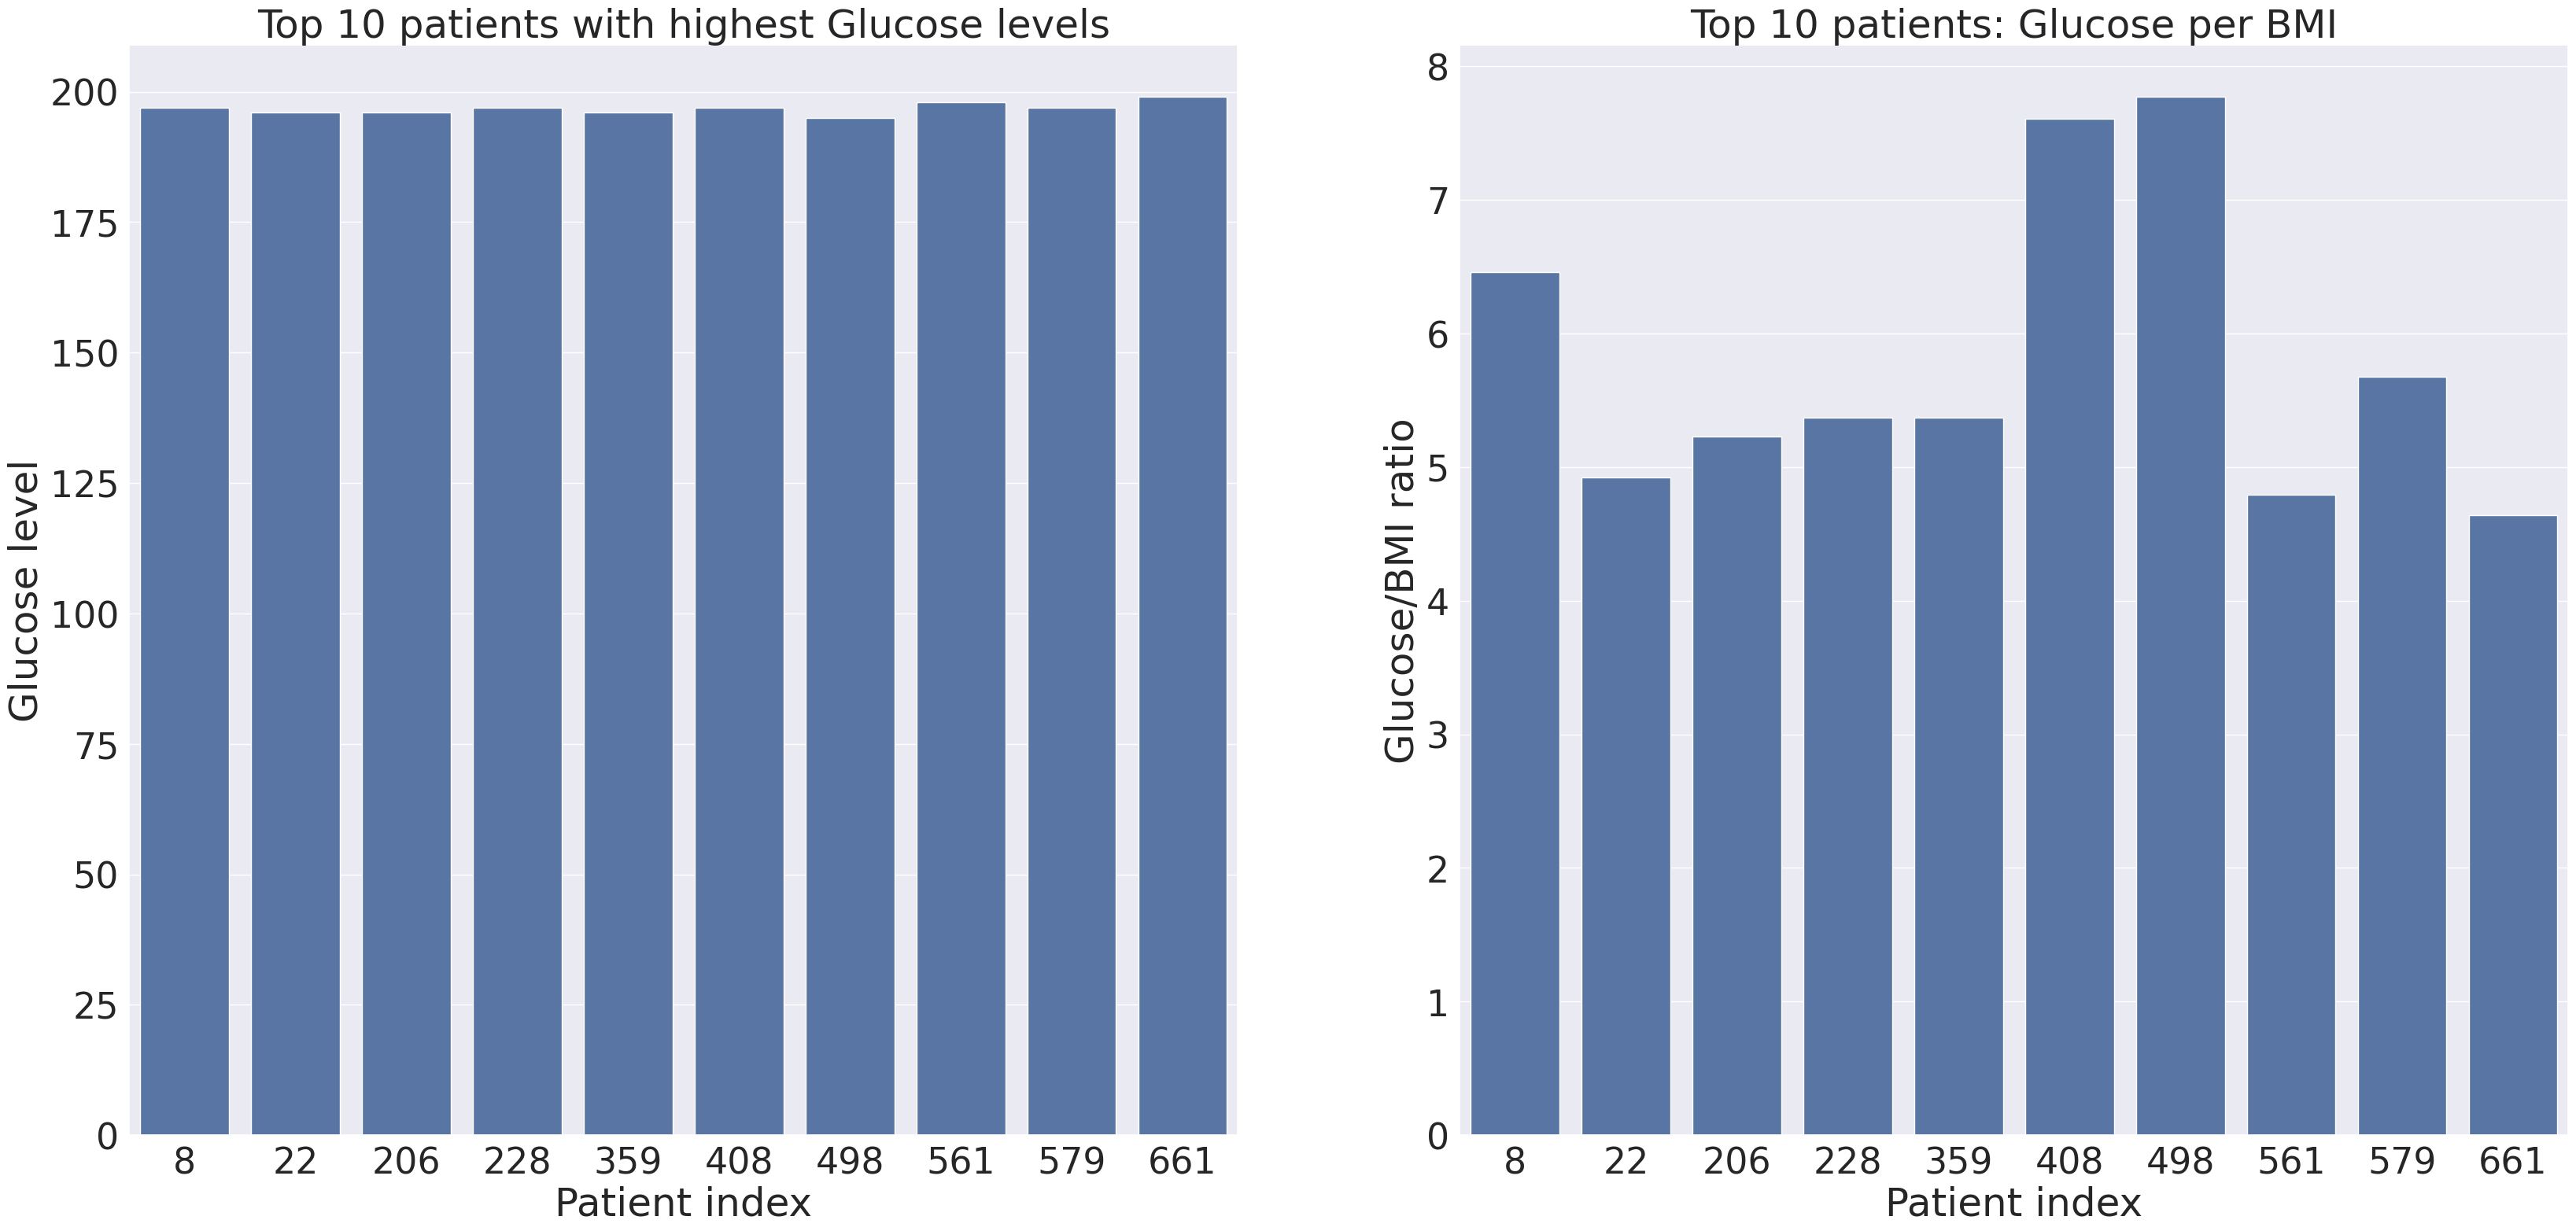

In [14]:
# case 1: basic
plt.figure(figsize=(12,6))
data = diabetes_sorted[0:10]
sns.barplot(data=data, x=data.index, y='Glucose')

# case 2: advanced 1
plt.figure(figsize=(12,6))
data = diabetes_sorted[0:10]
ax = sns.barplot(data=data, x=data.index, y='Glucose')
ax.set_xlabel('Patient index', fontsize=15)
ax.set_ylabel('Glucose level', fontsize=15)
ax.set_title('Top 10 patients with highest Glucose levels', fontsize=20)

# case 3: view multiple perspectives at once
fig, ax = plt.subplots(1, 2, figsize=(40,18))
data = diabetes_sorted[0:10]
sns.set(font_scale=3)

ax1 = sns.barplot(data=data, x=data.index, y='Glucose', ax=ax[0])
ax1.set_xlabel('Patient index')
ax1.set_ylabel('Glucose level')
ax1.set_title('Top 10 patients with highest Glucose levels')

ax2 = sns.barplot(data=data, x=data.index, y='Glucose_per_BMI', ax=ax[1])
ax2.set_xlabel('Patient index')
ax2.set_ylabel('Glucose/BMI ratio')
ax2.set_title('Top 10 patients: Glucose per BMI')

 + **Thực hiện EDA trên tập dữ liệu mua sắm tại siêu thị.**

*Bước 1: Đọc dữ liệu và khám phá sơ bộ*

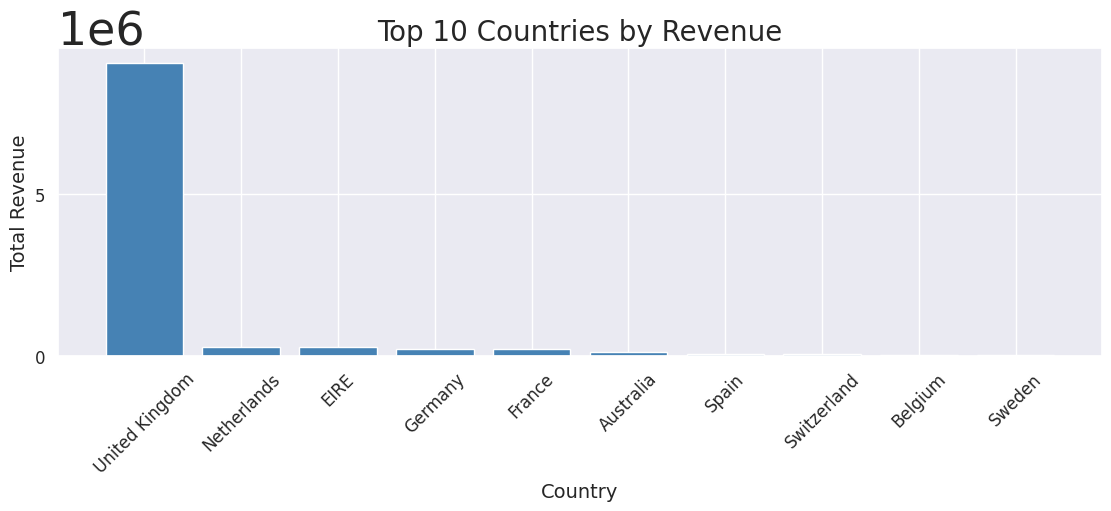

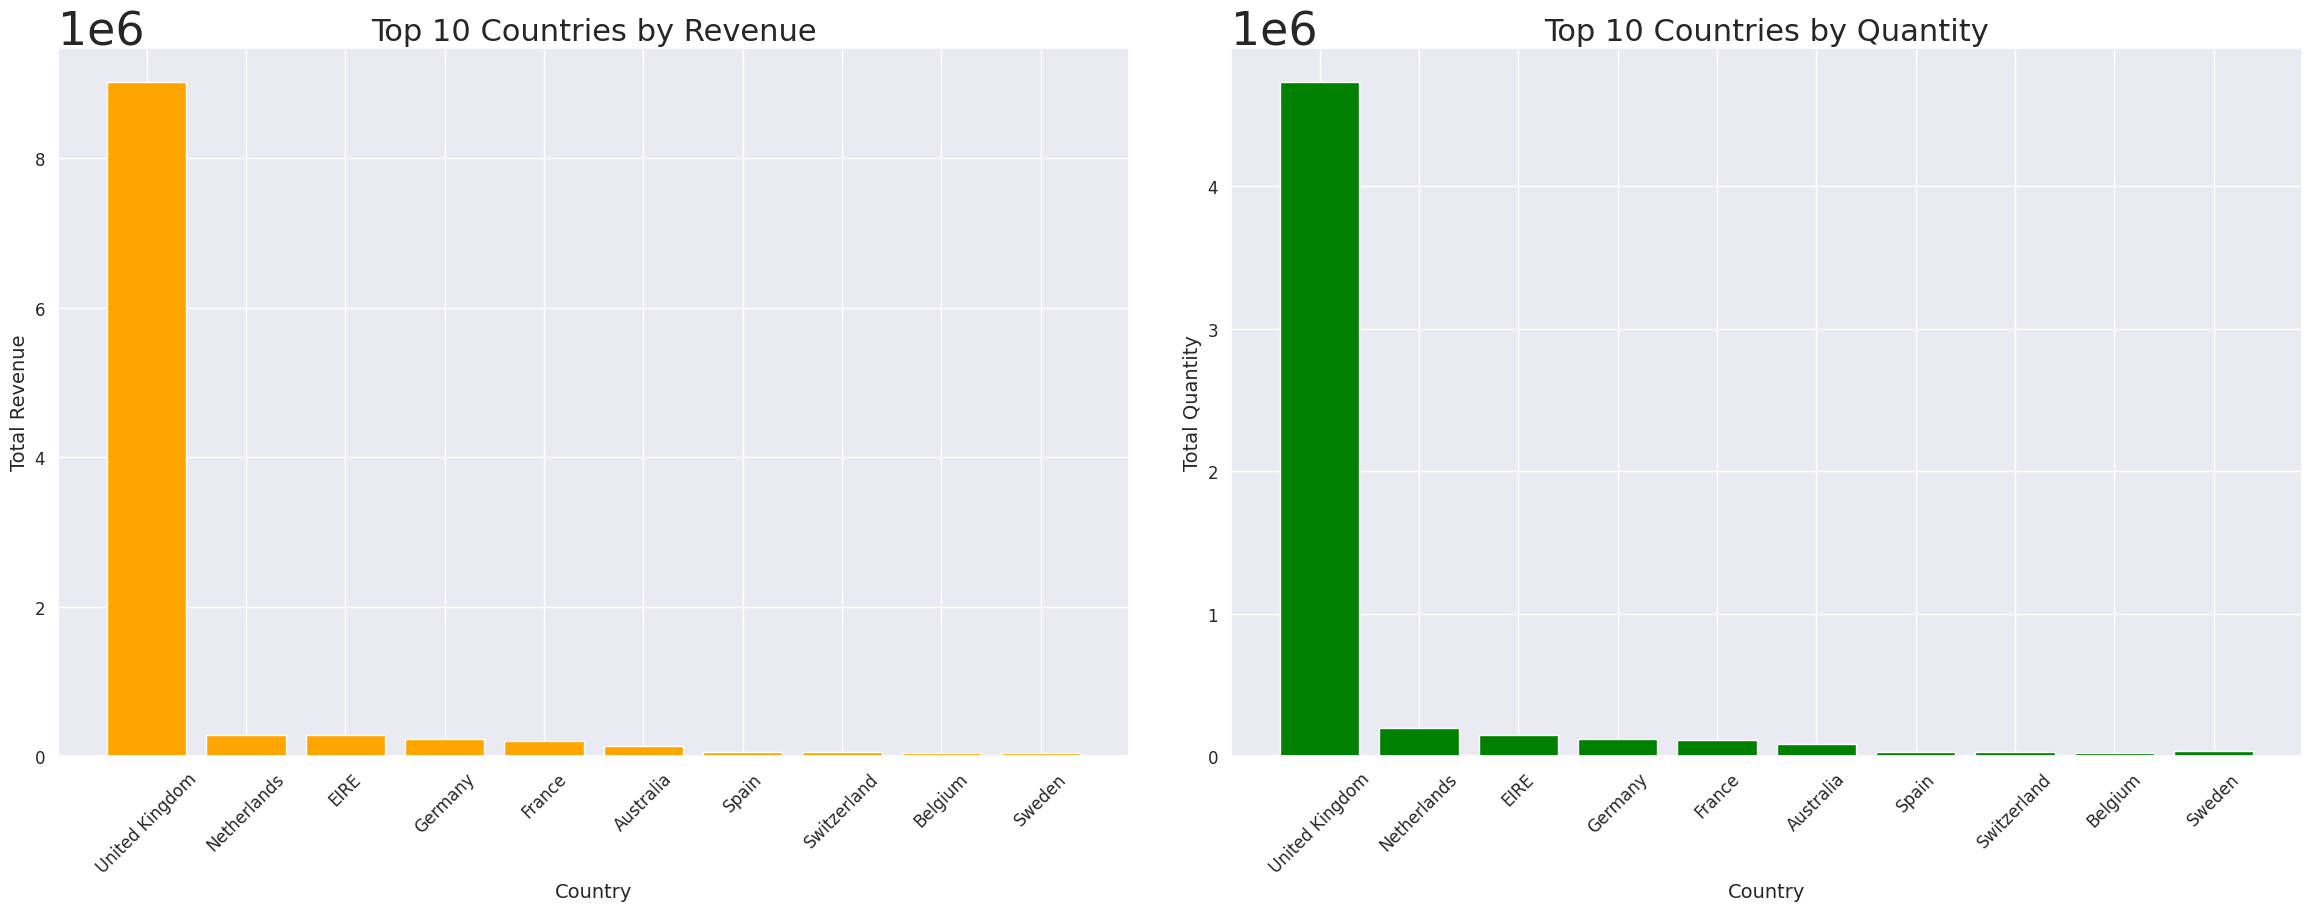

/tmp/ipython-input-125007880.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)


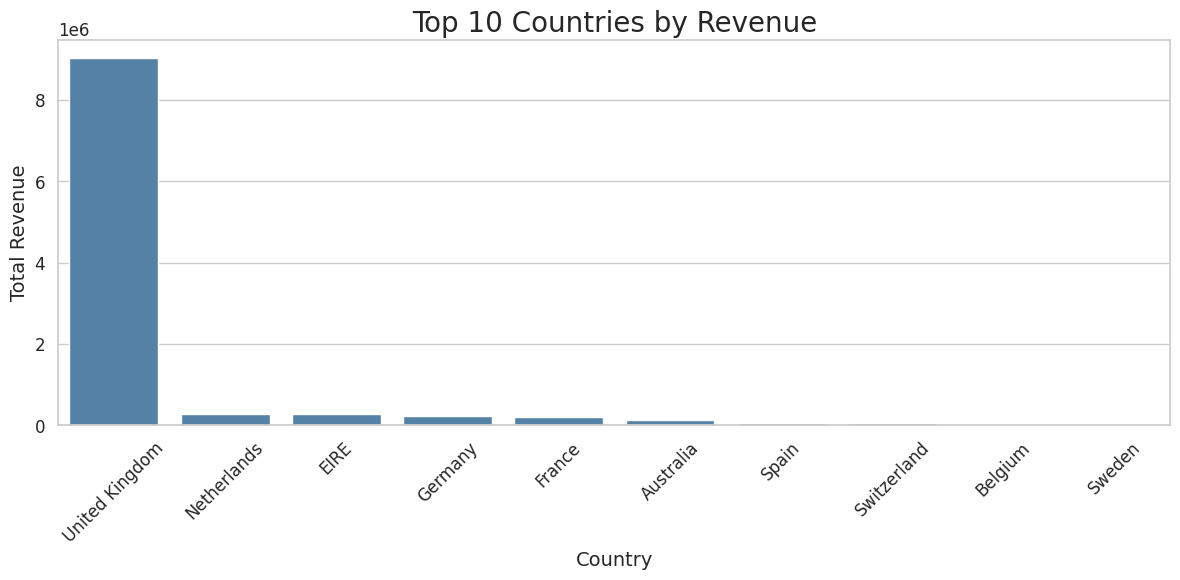

/tmp/ipython-input-125007880.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=12)
/tmp/ipython-input-125007880.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=12)


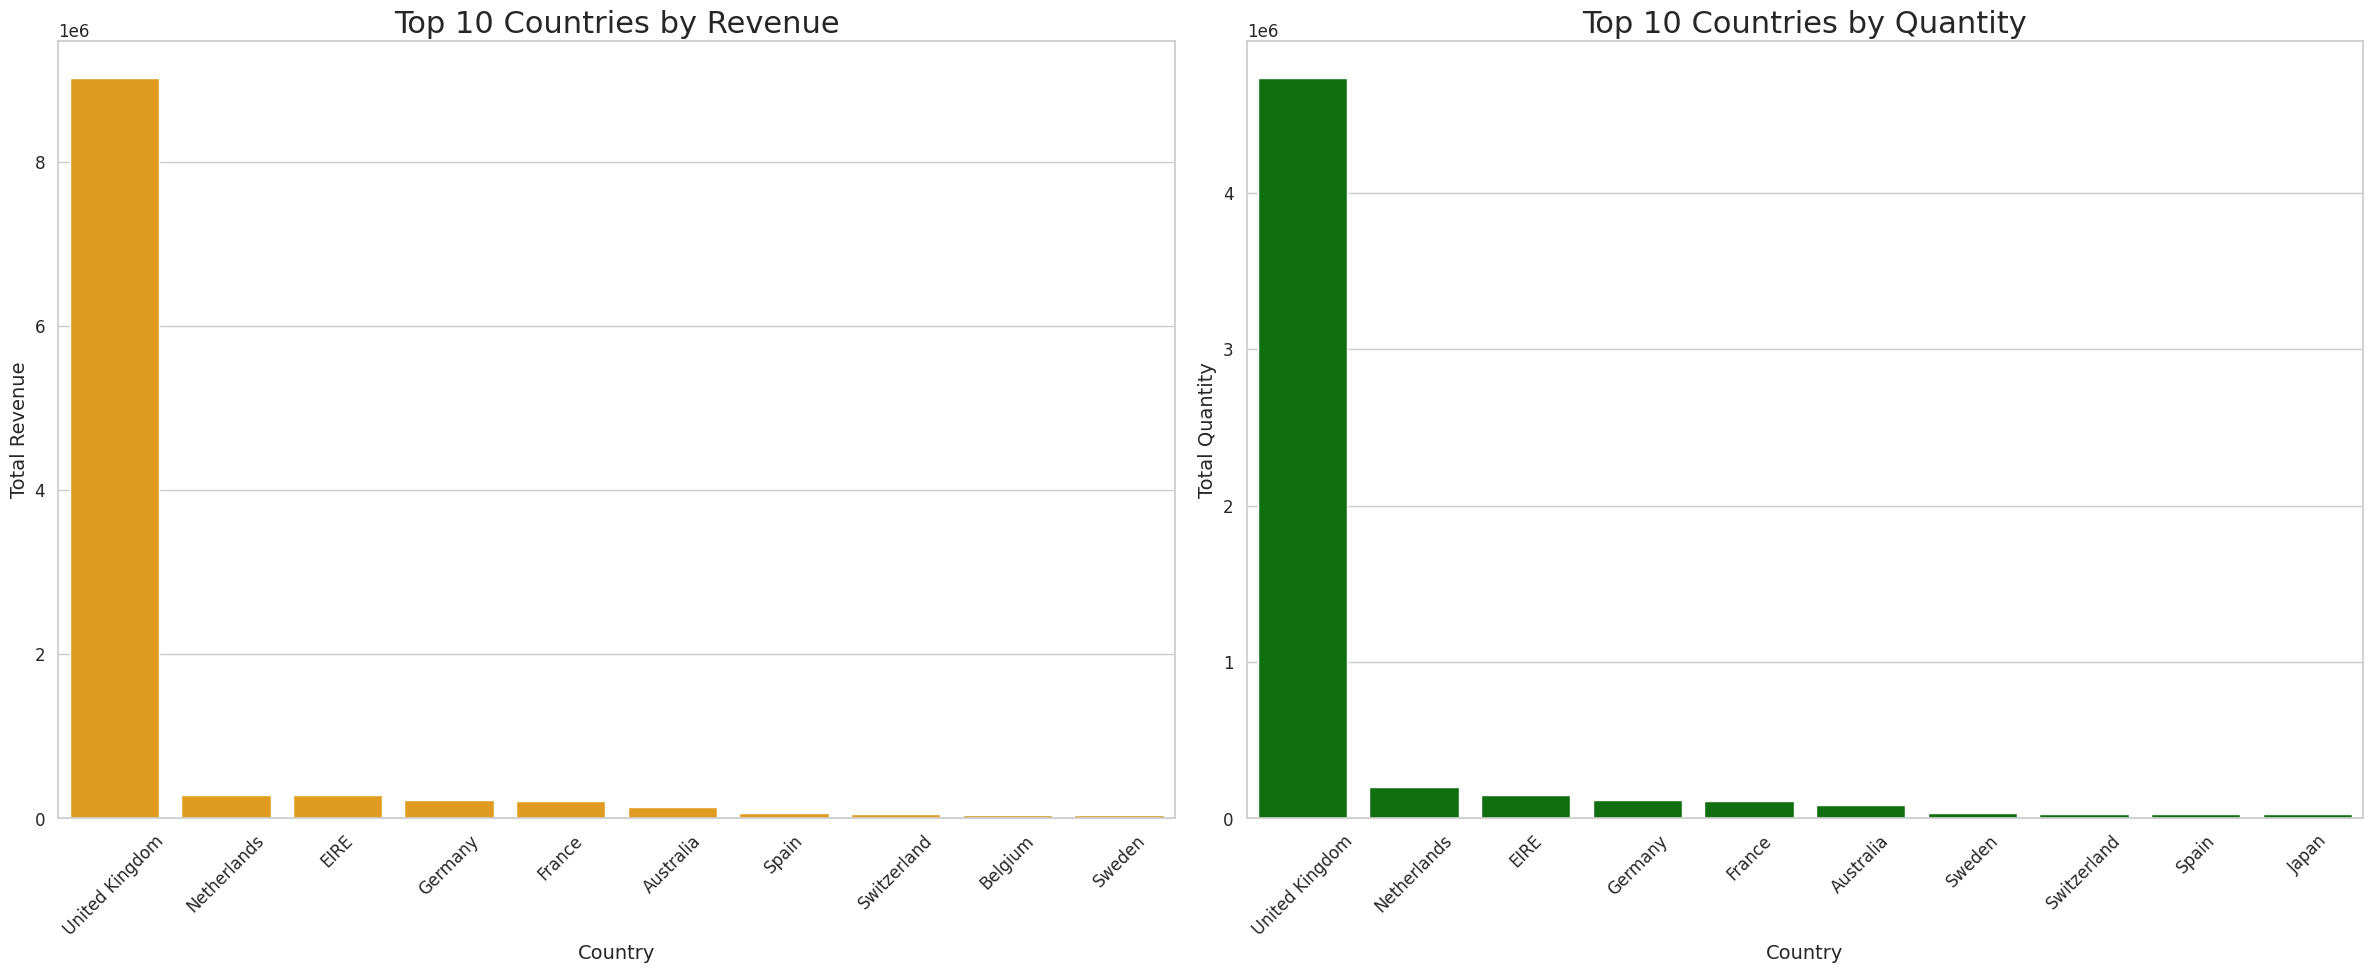

In [17]:
# Code sửa lỗi và chạy đầy đủ (không gây SyntaxError)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Đọc dữ liệu
df = pd.read_excel("Online Retail.xlsx")

# 2) Chọn cột cần dùng và ép kiểu số an toàn
df = df[['Country', 'Quantity', 'UnitPrice']].copy()
df['Quantity']  = pd.to_numeric(df['Quantity'],  errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# 3) Loại bỏ hàng không hợp lệ
df = df.dropna(subset=['Country', 'Quantity', 'UnitPrice'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] >= 0]

# 4) Tạo cột doanh thu và tổng hợp theo quốc gia
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
country_revenue  = df.groupby('Country', as_index=False)['TotalPrice'].sum().sort_values('TotalPrice', ascending=False)
country_quantity = df.groupby('Country', as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False)

# ================= MATPLOTLIB =================
# Top 10 quốc gia theo doanh thu
plt.figure(figsize=(12,6))
x = country_revenue['Country'].head(10)
y = country_revenue['TotalPrice'].head(10)
plt.bar(x, y, color='steelblue')
plt.title('Top 10 Countries by Revenue', fontsize=20)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# So sánh doanh thu và số lượng (2 biểu đồ)
fig, axes = plt.subplots(1, 2, figsize=(24,10))
# lấy số lượng theo cùng thứ tự x
y1 = country_quantity.set_index('Country').reindex(x)['Quantity']

axes[0].bar(x, y, color='orange')
axes[0].set_title('Top 10 Countries by Revenue', fontsize=22)
axes[0].set_xlabel('Country', fontsize=14)
axes[0].set_ylabel('Total Revenue', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

axes[1].bar(x, y1, color='green')
axes[1].set_title('Top 10 Countries by Quantity', fontsize=22)
axes[1].set_xlabel('Country', fontsize=14)
axes[1].set_ylabel('Total Quantity', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

# ================= SEABORN =================
sns.set_theme(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(12,6))
data = country_revenue.head(10)
ax = sns.barplot(data=data, x='Country', y='TotalPrice', color='steelblue')
ax.set_title('Top 10 Countries by Revenue', fontsize=20)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Total Revenue', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(24,10))
sns.set(font_scale=1.3)

ax1 = sns.barplot(data=country_revenue.head(10), x='Country', y='TotalPrice', ax=ax[0], color='orange')
ax1.set_title('Top 10 Countries by Revenue', fontsize=22)
ax1.set_xlabel('Country', fontsize=14)
ax1.set_ylabel('Total Revenue', fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=12)

ax2 = sns.barplot(data=country_quantity.head(10), x='Country', y='Quantity', ax=ax[1], color='green')
ax2.set_title('Top 10 Countries by Quantity', fontsize=22)
ax2.set_xlabel('Country', fontsize=14)
ax2.set_ylabel('Total Quantity', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=12)

plt.tight_layout()
plt.show()


a. Doanh thu theo quốc gia

In [ ]:
import matplotlib.pyplot as plt

top_countries = (retail.groupby('Country')['TotalAmount']
                 .sum()
                 .sort_values(ascending=False)
                 .head(10))

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title('Top 10 quốc gia doanh thu cao nhất')
plt.ylabel('Doanh thu')
plt.show()

b. Phân bố giá trị hóa đơn

In [ ]:
invoice_total = retail.groupby('InvoiceNo')['TotalAmount'].sum()

plt.figure(figsize=(8,5))
invoice_total.plot(kind='hist', bins=50)
plt.title('Phân bố tổng giá trị mỗi hóa đơn')
plt.xlabel('Giá trị hóa đơn')
plt.show()

c. Doanh thu theo tháng

In [ ]:
retail['Month'] = retail['InvoiceDate'].dt.to_period('M')
monthly_sales = retail.groupby('Month')['TotalAmount'].sum()

monthly_sales.plot(figsize=(12,5))
plt.title('Doanh thu theo tháng')
plt.ylabel('Doanh thu')
plt.xlabel('Tháng')
plt.show()

**1.3.3. Bài tập thực hành**

 Tìm hiểu các tính năng và cách sử dụng sản phẩm SweetViz

1. Import thư viện và nạp dữ liệu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file (dataset Kaggle dùng tab '\t' làm separator)
marketing_data = pd.read_csv("marketing_campaign.csv", sep="\t")

# Chọn một số cột tiêu biểu để phân tích
marketing_data = marketing_data[['Education','Income','Kidhome','Teenhome']]
marketing_data.head()



Phân tích đơn biến bằng Histogram (liên tục – Thu nhập)

In [ ]:
# case 1: basic
sns.histplot(data=marketing_data, x=marketing_data["Income"])
plt.show()

# case 2: advanced
plt.figure(figsize=(12,6))
ax = sns.histplot(data=marketing_data, x=marketing_data["Income"])
ax.set_xlabel('Income', fontsize=15)
ax.set_ylabel('Count of customers', fontsize=15)
ax.set_title('Univariate analysis of Income', fontsize=20)
plt.show()


Phân tích đơn biến bằng Bar Chart (rời rạc – Trình độ học vấn)

In [ ]:
# case 1: basic
sns.countplot(data=marketing_data, x=marketing_data['Education'])
plt.show()

# case 2: advanced
plt.figure(figsize=(12,6))
ax = sns.countplot(data=marketing_data, x=marketing_data['Education'])
ax.set_xlabel('Education Level', fontsize=15)
ax.set_ylabel('Number of customers', fontsize=15)
ax.set_title('Univariate analysis of Education', fontsize=20)
plt.xticks(rotation=30)
plt.show()


Phân tích đơn biến bằng Biểu đồ tròn (Pie Chart – Education)

In [ ]:
education_group = marketing_data.groupby('Education').count().reset_index()

# case 1: basic
plt.pie(education_group["Income"], labels=education_group['Education'])
plt.show()

# case 2: advanced
colors = ['gold','lightblue','lightgreen','orange','pink']
plt.pie(education_group["Income"],
        labels=education_group['Education'],
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Education Levels', fontsize=15)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import và nạp dữ liệu
marketing_data = pd.read_csv("marketing_campaign.csv", sep="\t")
marketing_data = marketing_data[['Education','Income','Kidhome','Teenhome','Recency']]
print("Kích thước dữ liệu:", marketing_data.shape)
display(marketing_data.head())

# 2. Histogram cho biến liên tục (Income)
plt.figure(figsize=(12,6))
sns.histplot(data=marketing_data, x="Income")
plt.xlabel('Income', fontsize=15)
plt.ylabel('Count of customers', fontsize=15)
plt.title('Univariate analysis of Income', fontsize=20)
plt.show()

# 3. Bar chart cho biến phân loại (Education)
plt.figure(figsize=(12,6))
sns.countplot(data=marketing_data, x="Education")
plt.xlabel('Education Level', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.title('Univariate analysis of Education', fontsize=20)
plt.xticks(rotation=30)
plt.show()

# 4. Pie chart cho Education
education_group = marketing_data.groupby('Education').count().reset_index()
plt.figure(figsize=(8,8))
plt.pie(education_group["Income"],
        labels=education_group['Education'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Education Levels', fontsize=15)
plt.show()

# 5. Kiểm tra dữ liệu thiếu & thống kê mô tả
print("\nSố giá trị thiếu mỗi cột:\n", marketing_data.isnull().sum())
display(marketing_data.describe())


In [ ]:
# Kiểm tra giá trị thiếu
print(marketing_data.isnull().sum())

# Thống kê mô tả cho các biến số
marketing_data.describe()


Nhiệm vụ 1: Tạo báo cáo tự động với pandas_profiling / ydata_profiling

*Bước 1 – Cài đặt thư viện*

In [ ]:
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport

# Đọc dữ liệu Customer Personality Analysis
marketing_data = pd.read_csv("marketing_campaign.csv", sep="\t")

# Tạo báo cáo EDA tự động
profile = ProfileReport(marketing_data,
                        title="Customer Personality Analysis - Profiling Report",
                        explorative=True)

# Xuất báo cáo ra file HTML
profile.to_file("profile_output.html")


*Bước 1 – Cài đặt D-Tale*

In [ ]:
!pip install dtale


*Bước 2 – Khởi chạy giao diện D-Tale*

In [ ]:
import dtale

# Dùng lại marketing_data đã đọc ở trên
d = dtale.show(marketing_data)
d.open_browser()   # mở giao diện D-Tale trên tab trình duyệt


1.3.4. Bài tập thực hành 2
Tìm hiểu các tính năng và cách sử dụng sản phẩm AutoViz (https://pypi.org/project/autoviz) áp dụng trên
tập dữ liệu Marketing Campaign

In [ ]:
#Cài đặt & import
!pip install autoviz
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
import seaborn as sns


#Nạp dữ liệu
marketing_data = pd.read_csv("marketing_campaign.csv", sep="\t")
marketing_data.info()

#Sinh báo cáo tự động
AV = AutoViz_Class()
# Assuming no dependent variable for AutoViz, adjust if needed
report = AV.AutoViz("", sep="\t", depVar="", dfte=marketing_data.copy(), header=0, verbose=1)


#Lưu thêm biểu đồ quan trọng
plt.figure(figsize=(10,8))
sns.heatmap(marketing_data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
# Create a directory for reports if it doesn't exist
import os
if not os.path.exists("Reports"):
    os.makedirs("Reports")
plt.savefig("Reports/marketing_corr_heatmap.png")
plt.show()